# Table of Contents
* [Load and Inspect DataFrames](#Load-and-Inspect-DataFrames)
	* [Intersections and Differences](#Intersections-and-Differences)
	* [Missing and Duplicates](#Missing-and-Duplicates)
	* [Electric DataFrame has no Duplicates:](#Electric-DataFrame-has-no-Duplicates:)
	* [Gas DataFrame contains 108 Duplicates:](#Gas-DataFrame-contains-108-Duplicates:)
		* [All duplicates occur in 2016:](#All-duplicates-occur-in-2016:)
		* [In Quarter 3 and Quarter 4 of 2016.](#In-Quarter-3-and-Quarter-4-of-2016.)
		* [Visualizing makes it much more clear](#Visualizing-makes-it-much-more-clear)
		* [With Duplicates:](#With-Duplicates:)
		* [Drop Duplicates](#Drop-Duplicates)
		* [Without Duplicates:](#Without-Duplicates:)
* [Explore completeness of Data](#Explore-completeness-of-Data)
	* [A random sample of data from Electric_DF](#A-random-sample-of-data-from-Electric_DF)
		* [Shows large amounts of incomplete data](#Shows-large-amounts-of-incomplete-data)
	* [Isolating the exploration to `Elec-Commercial` class](#Isolating-the-exploration-to-Elec-Commercial-class)
		* [Only 12 of the 345 Zip Codes contain complete data.](#Only-12-of-the-345-Zip-Codes-contain-complete-data.)
		* [Visualizing the Distribution:](#Visualizing-the-Distribution:)
		* [It is clear a large proportion of data contains sparse data](#It-is-clear-a-large-proportion-of-data-contains-sparse-data)
			* [Approximately 30% of the data contains at least 50 of the 60 available months](#Approximately-30%-of-the-data-contains-at-least-50-of-the-60-available-months)
			* [At the other end, ≈ 37% of the data contains less than 10 of the 60 available months](#At-the-other-end,-≈-37%-of-the-data-contains-less-than-10-of-the-60-available-months)
		* [However, when we have complete data, Trends over time are easier to visualize](#However,-when-we-have-complete-data,-Trends-over-time-are-easier-to-visualize)


In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
plt.style.use("seaborn")
%matplotlib inline

# Load and Inspect DataFrames

In [2]:
print(" "*30, "Rows  , Cols")
gas_df_raw = pd.read_csv("final_data/gas_raw.csv", index_col=0)
print("Raw Gas DataFrame shape:      ", gas_df_raw.shape)
gas_df = pd.read_csv("final_data/gas_duplicates.csv", index_col=0)
print("Gas DataFrame shape:          ", gas_df.shape)
elec_df_raw = pd.read_csv("final_data/electric_raw.csv", index_col=0)
print("Raw Electric DataFrame shape:", elec_df_raw.shape)
elec_df = pd.read_csv("final_data/electric.csv", index_col=0)
print("Electric DataFrame shape:    ", elec_df.shape)

                               Rows  , Cols
Raw Gas DataFrame shape:       (71302, 8)
Gas DataFrame shape:           (70137, 8)
Raw Electric DataFrame shape: (157058, 8)
Electric DataFrame shape:     (154443, 8)


In [3]:
print("\nElectric DF:")
elec_df.sample(3)


Electric DF:


,zip_code,month,year,customer_class,combined,total_customers,total_kWh,average_kWh
100376,93901,4,2016,Elec- Commercial,Y,2104,10562649,5020.0
72793,95981,5,2015,Elec- Commercial,Y,0,0,NaN
32317,94509,1,2014,Elec- Residential,N,22147,12173622,550.0


In [4]:
print("Gas DF:")
gas_df.sample(3)

Gas DF:


,zip_code,month,year,customer_class,combined,total_customers,total_Thm,average_Thm
26218,94043,11,2014,Gas- Residential,N,8400,319913,38.0
20900,93239,7,2014,Gas- Commercial,Y,0,0,NaN
67598,95328,10,2017,Gas- Residential,N,1165,20138,17.0


In [5]:
print('''Electric Unique:
{}

Gas Unique:
{}'''.format(elec_df.nunique(), gas_df.nunique()))

Electric Unique:
zip_code             902
month                 12
year                   5
customer_class         4
combined               2
total_customers    15096
total_kWh          69235
average_kWh        13190
dtype: int64

Gas Unique:
zip_code             656
month                 12
year                   5
customer_class         3
combined               2
total_customers    14115
total_Thm          45938
average_Thm         1117
dtype: int64


In [6]:
print('''
Electric Unique Customer Classes:
{}

Gas Unique Customer Classes:
{}'''.format(elec_df.customer_class.unique(), 
             gas_df.customer_class.unique()))


Electric Unique Customer Classes:
['Elec- Agricultural' 'Elec- Commercial' 'Elec- Industrial'
 'Elec- Residential']

Gas Unique Customer Classes:
['Gas- Commercial' 'Gas- Residential' 'Gas- Agricultural']


## Intersections and Differences

In [7]:
e_uniq, g_uniq = elec_df.zip_code.nunique(), gas_df.zip_code.nunique()
print("Total number of zipcodes in Elec_DF: {}".format(e_uniq))
print("Total number of zipcodes in Gas_DF:  {}\n".format(g_uniq))

e_zips, g_zips = set(elec_df.zip_code), set(gas_df.zip_code)
same_zip_codes = len(e_zips.intersection(g_zips))
diff_elec_zip_codes = len(e_zips.difference(g_zips))
diff_gas_zip_codes = g_uniq - same_zip_codes
print("Same zipcodes among both DataFrames: {}".format(same_zip_codes))
print("# of zipcodes in Elec but not Gas:   {}".format(diff_elec_zip_codes))
print("# of zipcodes in Gas but not Elec:   {}".format(diff_gas_zip_codes))

Total number of zipcodes in Elec_DF: 902
Total number of zipcodes in Gas_DF:  656

Same zipcodes among both DataFrames: 610
# of zipcodes in Elec but not Gas:   292
# of zipcodes in Gas but not Elec:   46


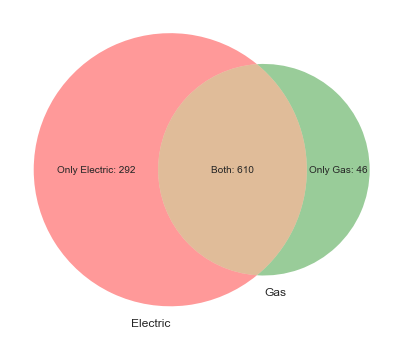

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
v = venn2(subsets = (3, 1, 2), set_labels=("Electric", "Gas"))
# Subset labels
v.get_label_by_id('10').set_text('Only Electric: '+str(diff_elec_zip_codes))
v.get_label_by_id('01').set_text('Only Gas: '+str(diff_gas_zip_codes))
v.get_label_by_id('11').set_text('Both: '+str(same_zip_codes))
plt.savefig("final_data/venn")

## Missing and Duplicates

In [9]:
elec_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154443 entries, 0 to 154442
Data columns (total 8 columns):
zip_code           154443 non-null int64
month              154443 non-null int64
year               154443 non-null int64
customer_class     154443 non-null object
combined           154443 non-null object
total_customers    154443 non-null int64
total_kWh          154443 non-null int64
average_kWh        69676 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 10.6+ MB


In [10]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70137 entries, 0 to 70136
Data columns (total 8 columns):
zip_code           70137 non-null int64
month              70137 non-null int64
year               70137 non-null int64
customer_class     70137 non-null object
combined           70137 non-null object
total_customers    70137 non-null int64
total_Thm          70137 non-null int64
average_Thm        48592 non-null float64
dtypes: float64(1), int64(5), object(2)
memory usage: 4.8+ MB


In [11]:
print('''Electric Missing Data:
{}

Gas Missing Data:
{}'''.format(elec_df.isnull().sum(), 
             gas_df.isnull().sum()))

Electric Missing Data:
zip_code               0
month                  0
year                   0
customer_class         0
combined               0
total_customers        0
total_kWh              0
average_kWh        84767
dtype: int64

Gas Missing Data:
zip_code               0
month                  0
year                   0
customer_class         0
combined               0
total_customers        0
total_Thm              0
average_Thm        21545
dtype: int64


In [12]:
e_cnt, e_avg_miss = elec_df.shape[0], elec_df.average_kWh.isnull().sum()
"Missing `average_kWh` electric data: {:.2f}%".format(e_avg_miss/e_cnt *100)

'Missing `average_kWh` electric data: 54.89%'

In [13]:
g_cnt, g_avg_miss = gas_df.shape[0], gas_df.average_Thm.isnull().sum()
"Missing `average_Thm` gas data: {:.2f}%".format(g_avg_miss/g_cnt *100)

'Missing `average_Thm` gas data: 30.72%'

## Electric DataFrame has no Duplicates:

In [14]:
dup_check = ["zip_code", "month", "year", "customer_class", "combined"]

In [15]:
elec_df[elec_df.duplicated(dup_check, keep=False)]

,zip_code,month,year,customer_class,combined,total_customers,total_kWh,average_kWh


## Gas DataFrame contains 108 Duplicates:

In [16]:
gas_dup_check = \
    gas_df[gas_df.duplicated(dup_check, keep=False)].sort_values(["year","zip_code"])

gas_dup_check.head(4)

,zip_code,month,year,customer_class,combined,total_customers,total_Thm,average_Thm
49401,93606,7,2016,Gas- Residential,N,277,4370,16.0
49402,93606,7,2016,Gas- Residential,N,291,260709,896.0
50636,93606,8,2016,Gas- Residential,N,273,4429,16.0
50637,93606,8,2016,Gas- Residential,N,287,242709,846.0


In [17]:
g_tot_dup = gas_dup_check.shape[0]/2
percent = g_tot_dup/g_cnt*100
"Approximately {:.2f}% of the Rows contain Duplicates in Gas_DF".format(percent)

'Approximately 0.15% of the Rows contain Duplicates in Gas_DF'

### All duplicates occur in 2016:

In [18]:
gas_dup_check.year.value_counts()

2016    216
Name: year, dtype: int64

### In Quarter 3 and Quarter 4 of 2016.

In [19]:
gas_dup_check.groupby("year").month.value_counts()

year  month
2016  7        36
      8        36
      9        36
      10       36
      11       36
      12       36
Name: month, dtype: int64

### Visualizing makes it much more clear

In [21]:
def show_zips(zip_codes, save_dir=None):
    '''
    Inputs: `zip_codes` List of Zip Codes to plot
            `save_dir` directory to save images, 
            defaults to None, plots images
    Returns: images of `average_Thm` over time
    '''
    for z in zip_codes:
        query = "zip_code == {}".format(z)
        q_df = gas_df.query(query)
        if q_df.customer_class.nunique() > 1:
            fig, ax = plt.subplots(figsize=(8,6))
            for key, grp in q_df.groupby("customer_class"):
                ax = grp.plot(ax=ax, 
                              kind='line', 
                              x=["year", "month"],
                              y="average_Thm",
                              title="Zip Code: {}".format(z), 
                              label=key,
                              )
            plt.legend(loc='best')
        else:
            q_df.plot(x=["year", "month"], 
                      y="average_Thm",
                      title="Zip Code: {}".format(z),
                      figsize=(8,6), 
                     )
        plt.xlabel("Time", fontsize="large")
        plt.ylabel("Average Thermal", fontsize="large")
        if save_dir:
            plt.savefig(os.path.join("final_data", 
                                     save_dir, 
                                     "gas_{}".format(z)))
        plt.show();
    plt.close("all")

### With Duplicates:

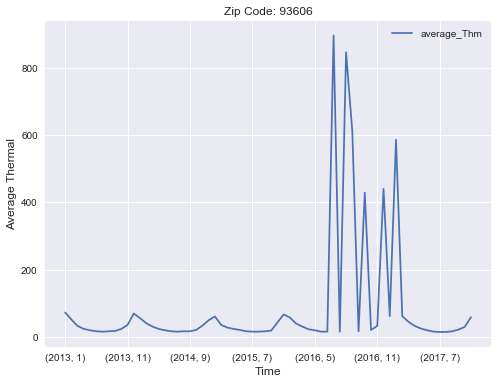

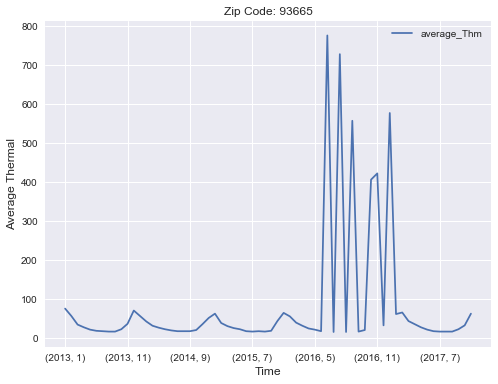

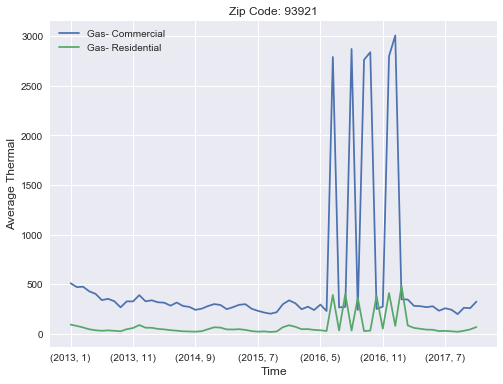

In [22]:
first_3_zips = gas_dup_check.zip_code.unique()[:3]
show_zips(first_3_zips, "duplicate_images")

### Drop Duplicates

In [23]:
indices = []
for z in gas_dup_check.zip_code.unique():
    q1 = "zip_code == {}".format(z)
    df = gas_dup_check.query(q1)
    for c in df.customer_class.unique():
        q2 = "customer_class == '{}'".format(c)
        limit = 5 * gas_df.query(q1).query(q2).average_Thm.median()
        sub_df = df.query(q2)
        idx_df = sub_df[sub_df.average_Thm > limit][["zip_code", "average_Thm"]]
        idxs = idx_df.index.tolist()
        indices += idxs

In [24]:
gas_df.drop(labels=indices, inplace=True)

In [25]:
gas_df.duplicated(dup_check).sum()

0

In [26]:
gas_df.to_csv("final_data/gas.csv")

In [27]:
gas_df.shape

(70029, 8)

### Without Duplicates:

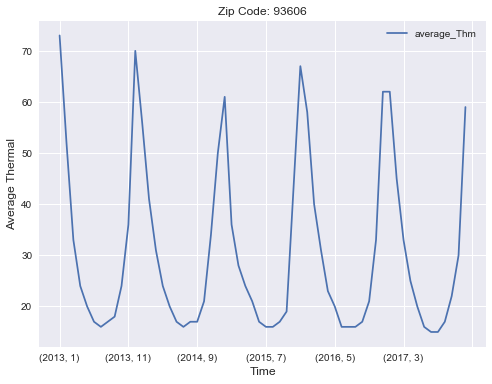

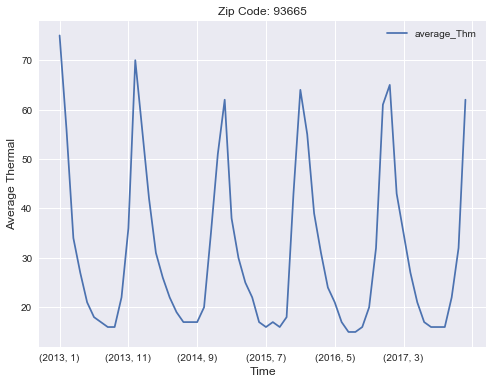

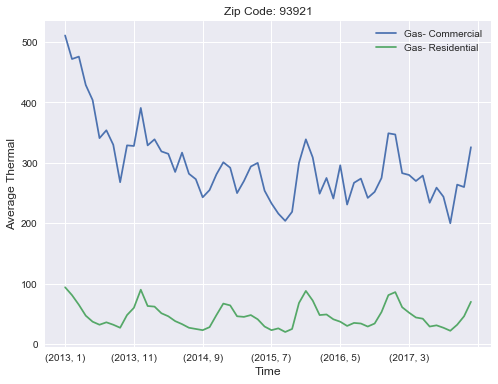

In [28]:
show_zips(first_3_zips, "deduped_images")

___

# Explore completeness of Data

##  A random sample of data from Electric_DF

### Shows large amounts of incomplete data

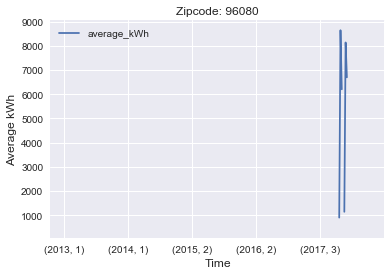

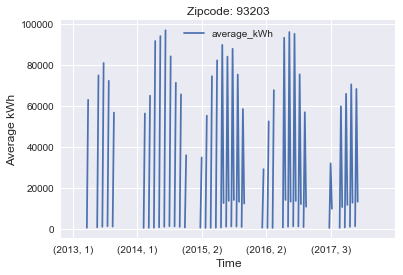

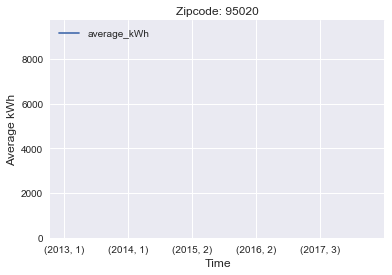

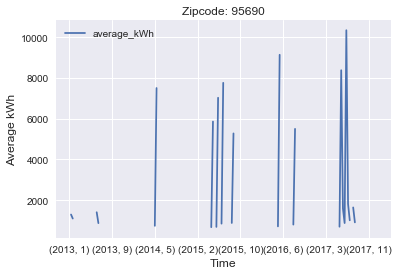

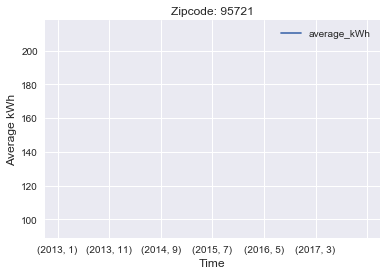

In [29]:
elec_samp = elec_df.sample(5).zip_code.unique()
for z in elec_samp:
    query = "zip_code == {}".format(z)
    elec_df.query(query).plot(x=["year", "month"], 
                             y="average_kWh",
                             title="Zipcode: {}".format(z)
                            )
    plt.xlabel("Time", fontsize="large")
    plt.ylabel("Average kWh", fontsize="large")
    plt.show();
plt.close("all")

## Isolating the exploration to `Elec-Commercial` class

In [30]:
# query based on at least one customer and not being combined with another zip_code
commercial = elec_df[(elec_df.customer_class == "Elec- Commercial") &
                     (elec_df.total_customers > 0) & 
                     (elec_df.combined == 'N')].zip_code

"{} zip_codes with at least one uncombined data point".format(commercial.nunique())

'345 zip_codes with at least one uncombined data point'

### Only 12 of the 345 Zip Codes contain complete data. 

In [31]:
counts = commercial.value_counts()
complete_data = counts[counts==60].index.tolist()
print(len(complete_data))
complete_data

12


[94801,
 94110,
 94534,
 94123,
 94117,
 95616,
 94112,
 93440,
 95387,
 94965,
 94945,
 93921]

### Visualizing the Distribution:

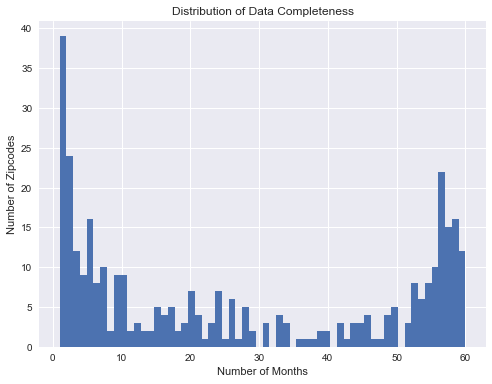

In [32]:
fig, ax = plt.subplots(figsize=(8,6))
plt.hist(commercial.value_counts(), bins=60)
plt.xlabel("Number of Months")
plt.ylabel("Number of Zipcodes")
plt.title("Distribution of Data Completeness");

### It is clear a large proportion of data contains sparse data

#### Approximately 30% of the data contains at least 50 of the 60 available months

In [33]:
at_least_50 = counts[counts >= 50]
len(at_least_50)/len(counts)*100

30.434782608695656

#### At the other end, ≈ 37% of the data contains less than 10 of the 60 available months

In [34]:
less_than_10 = counts[counts < 10]
len(less_than_10)/len(counts)*100

37.391304347826086

### However, when we have complete data, Trends over time are easier to visualize

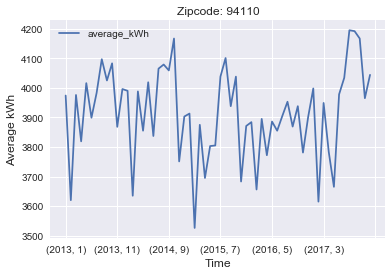

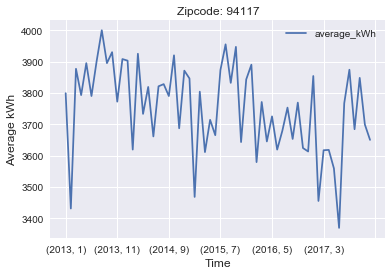

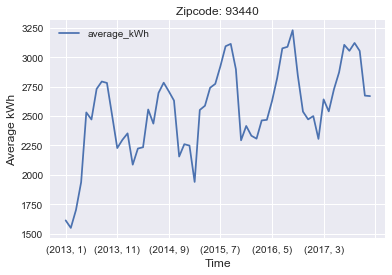

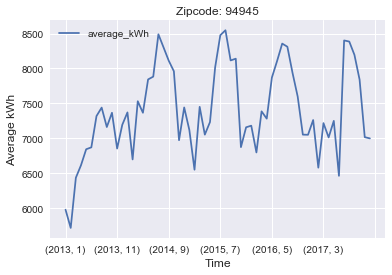

In [35]:
for z in complete_data[1::3]:
    cust = "Elec- Commercial"
    query = (elec_df.zip_code == z) & (elec_df.customer_class == cust)
    elec_df[query].plot(x=["year", "month"], 
                             y="average_kWh",
                             title="Zipcode: {}".format(z)
                            )
    plt.xlabel("Time", fontsize="large")
    plt.ylabel("Average kWh", fontsize="large")
    plt.show();
plt.close("all")

___